<a href="https://colab.research.google.com/github/raa18-git/ruchi/blob/main/ML_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 14.754670439816477
Epoch 100, Loss: 0.016789211327213994
Epoch 200, Loss: 0.024406741705668332
Epoch 300, Loss: 0.011659234077480526
Epoch 400, Loss: 0.010636765995110485
Epoch 500, Loss: 0.012339213799442911
Epoch 600, Loss: 0.009075781756496894
Epoch 700, Loss: 0.008779196702615703
Epoch 800, Loss: 0.008198577581784411
Epoch 900, Loss: 0.006847698611836742
Epoch 1000, Loss: 0.0070565063578637835
Epoch 1100, Loss: 0.006340860740211606
Epoch 1200, Loss: 0.006169963367977018
Epoch 1300, Loss: 0.008959447508585561
Epoch 1400, Loss: 0.0045445572615359885
Epoch 1500, Loss: 0.005662414796962746
Epoch 1600, Loss: 0.00366688814343317
Epoch 1700, Loss: 0.0036357118188677985
Epoch 1800, Loss: 0.0036511234733911362
Epoch 1900, Loss: 0.0034785776557223116
Epoch 2000, Loss: 0.003723847482551419
Epoch 2100, Loss: 0.00337804111684326
Epoch 2200, Loss: 0.0036991248319297176
Epoch 2300, Loss: 0.003306698096614388
Epoch 2400, Loss: 0.0033069803214068987
Epoch 2500, Loss: 0.00416670686172

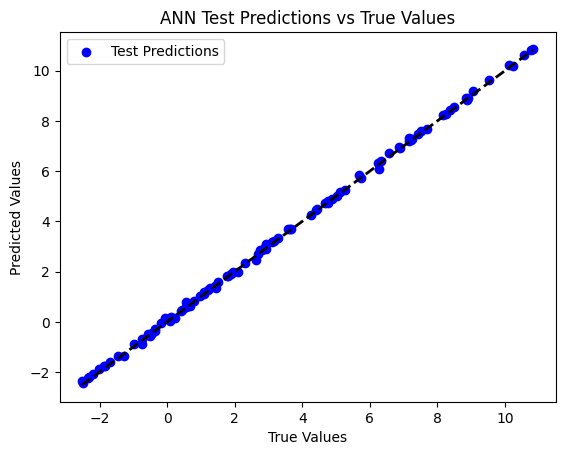

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
def target_function(x1, x2):
    return 12 * x1**2 - 1 + 2 * x2 - x2**2 / 100

# Define the activation function (ReLU for hidden layer) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the ANN class with mini-batch gradient descent
class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.005):
        self.learning_rate = learning_rate
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_output = np.zeros((1, output_size))

    def forward(self, x):
        # Input to hidden layer
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  # No activation on output layer for regression
        return self.output

    def backward(self, x, y, output):
        # Output layer error
        output_error = output - y
        output_delta = output_error  # No activation derivative for output layer

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * relu_derivative(self.hidden_input)

        # Gradient descent weight and bias updates
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, x, y, epochs=3000, batch_size=32):
        n = x.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(n)
            x_shuffled = x[indices]
            y_shuffled = y[indices]

            for i in range(0, n, batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                output = self.forward(x_batch)
                self.backward(x_batch, y_batch, output)

            # Compute the loss periodically for monitoring
            if epoch % 100 == 0:
                output = self.forward(x)
                loss = np.mean((y - output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, x):
        return self.forward(x)

# Generate training data
np.random.seed(0)
x1_train = np.random.uniform(-1, 1, 200).reshape(-1, 1)
x2_train = np.random.uniform(-1, 1, 200).reshape(-1, 1)
x_train = np.hstack((x1_train, x2_train))
y_train = target_function(x1_train, x2_train)

# Initialize and train the network
input_size = 2
hidden_size = 20  # Increased number of neurons
output_size = 1
learning_rate = 0.005  # Reduced learning rate for more stable convergence

ann = ANN(input_size, hidden_size, output_size, learning_rate)
ann.train(x_train, y_train, epochs=3000, batch_size=32)

# Generate test data
x1_test = np.random.uniform(-1, 1, 100).reshape(-1, 1)
x2_test = np.random.uniform(-1, 1, 100).reshape(-1, 1)
x_test = np.hstack((x1_test, x2_test))
y_test = target_function(x1_test, x2_test)

# Calculate training and test errors
y_train_pred = ann.predict(x_train)
y_test_pred = ann.predict(x_test)

train_error = np.mean((y_train - y_train_pred) ** 2)
test_error = np.mean((y_test - y_test_pred) ** 2)

print("\nTraining Error:", train_error)
print("Test Error:", test_error)

# Plotting results for test data
plt.scatter(y_test, y_test_pred, color="blue", label="Test Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("ANN Test Predictions vs True Values")
plt.show()


Epoch 0, Loss: 14.754670439816477
Epoch 100, Loss: 0.016789211327213994
Epoch 200, Loss: 0.024406741705668332
Epoch 300, Loss: 0.011659234077480526
Epoch 400, Loss: 0.010636765995110485
Epoch 500, Loss: 0.012339213799442911
Epoch 600, Loss: 0.009075781756496894
Epoch 700, Loss: 0.008779196702615703
Epoch 800, Loss: 0.008198577581784411
Epoch 900, Loss: 0.006847698611836742
Epoch 1000, Loss: 0.0070565063578637835
Epoch 1100, Loss: 0.006340860740211606
Epoch 1200, Loss: 0.006169963367977018
Epoch 1300, Loss: 0.008959447508585561
Epoch 1400, Loss: 0.0045445572615359885
Epoch 1500, Loss: 0.005662414796962746
Epoch 1600, Loss: 0.00366688814343317
Epoch 1700, Loss: 0.0036357118188677985
Epoch 1800, Loss: 0.0036511234733911362
Epoch 1900, Loss: 0.0034785776557223116
Epoch 2000, Loss: 0.003723847482551419
Epoch 2100, Loss: 0.00337804111684326
Epoch 2200, Loss: 0.0036991248319297176
Epoch 2300, Loss: 0.003306698096614388
Epoch 2400, Loss: 0.0033069803214068987
Epoch 2500, Loss: 0.00416670686172

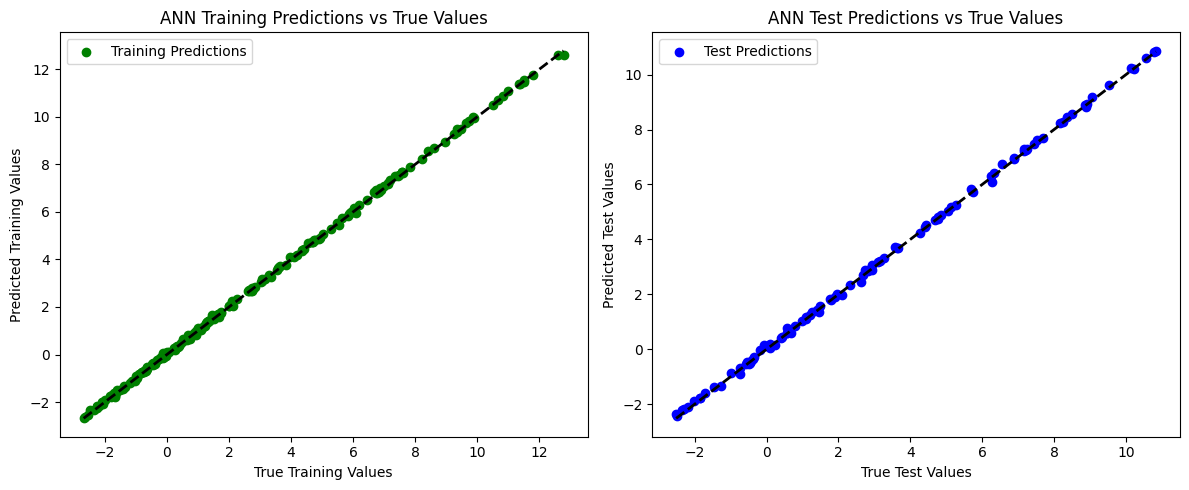

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
def target_function(x1, x2):
    return 12 * x1**2 - 1 + 2 * x2 - x2**2 / 100

# Define the activation function (ReLU for hidden layer) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the ANN class with mini-batch gradient descent
class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.005):
        self.learning_rate = learning_rate
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_output = np.zeros((1, output_size))

    def forward(self, x):
        # Input to hidden layer
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  # No activation on output layer for regression
        return self.output

    def backward(self, x, y, output):
        # Output layer error
        output_error = output - y
        output_delta = output_error  # No activation derivative for output layer

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * relu_derivative(self.hidden_input)

        # Gradient descent weight and bias updates
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, x, y, epochs=3000, batch_size=32):
        n = x.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(n)
            x_shuffled = x[indices]
            y_shuffled = y[indices]

            for i in range(0, n, batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                output = self.forward(x_batch)
                self.backward(x_batch, y_batch, output)

            # Compute the loss periodically for monitoring
            if epoch % 100 == 0:
                output = self.forward(x)
                loss = np.mean((y - output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, x):
        return self.forward(x)

# Generate training data
np.random.seed(0)
x1_train = np.random.uniform(-1, 1, 200).reshape(-1, 1)
x2_train = np.random.uniform(-1, 1, 200).reshape(-1, 1)
x_train = np.hstack((x1_train, x2_train))
y_train = target_function(x1_train, x2_train)

# Initialize and train the network
input_size = 2
hidden_size = 20  # Increased number of neurons
output_size = 1
learning_rate = 0.005  # Reduced learning rate for more stable convergence

ann = ANN(input_size, hidden_size, output_size, learning_rate)
ann.train(x_train, y_train, epochs=3000, batch_size=32)

# Generate test data
x1_test = np.random.uniform(-1, 1, 100).reshape(-1, 1)
x2_test = np.random.uniform(-1, 1, 100).reshape(-1, 1)
x_test = np.hstack((x1_test, x2_test))
y_test = target_function(x1_test, x2_test)

# Calculate training and test errors
y_train_pred = ann.predict(x_train)
y_test_pred = ann.predict(x_test)

train_error = np.mean((y_train - y_train_pred) ** 2)
test_error = np.mean((y_test - y_test_pred) ** 2)

print("\nTraining Error:", train_error)
print("Test Error:", test_error)

# Plotting results for training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="green", label="Training Predictions")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("True Training Values")
plt.ylabel("Predicted Training Values")
plt.legend()
plt.title("ANN Training Predictions vs True Values")

# Plotting results for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="blue", label="Test Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("True Test Values")
plt.ylabel("Predicted Test Values")
plt.legend()
plt.title("ANN Test Predictions vs True Values")

plt.tight_layout()
plt.show()
